In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Python complain the test between a string and a matrix in the world definition
# so I filter out the annoying future warning output  
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [51]:
def next_gen(world):
    
    height, width = world.shape 
    new_world = np.zeros((height, width), np.int8)
    count = 0
    
    for i in range(height): 
        for j in range(width):
            
            cell = world[i][j]
            count = count + 1 if cell else count
            
            neighbours_count = np.array([
                    world[i_r][j_r]
                    for i_r in ((i-1)%height, i, (i+1)%height) 
                    for j_r in ((j-1)%width, j, (j+1)%width)
            ]).sum() - cell
            
            if cell and neighbours_count in (2, 3):
                new_world[i][j] = 1
                
            elif (not cell) and neighbours_count == 3:
                new_world[i][j] = 1
            
    return new_world, count

def game(time,seed='default'):
    width, height = 100, 50
    space = height*width
    density = [] # a density matrix for the plot
    
    # The following code screams to be a dictionary
    if seed == 'default':
        world = np.random.randint(0, 2, (height, width), np.int8)
    elif seed == 'hive':
        world = np.array([[0,0,0,0,0],[0,0,1,0,0],[0,1,0,1,0],[0,1,0,1,0],[0,0,1,0,0],[0,0,0,0,0]])
    elif seed == 'block':
        world = np.array([[0,0,0,0],[0,1,1,0],[0,1,1,0],[0,0,0,0]])
    elif seed == 'glider':
        world = np.array([[0,0,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,1,1,1,0],[0,0,0,0,0]])
    elif seed == 'gospergun':
        world = np.array([ [0,0,0,0,0,0,0],
                          [0,1,1,1,0,1,0],
                          [0,1,0,0,0,0,0],
                          [0,0,0,0,1,1,0],
                          [0,0,1,1,0,1,0],
                          [0,1,0,1,0,1,0],
                          [0,0,0,0,0,0,0],])
    elif seed == 'replicator':
        world = np.array([ [0,0,0,0,0,0,0],
                          [0,0,0,1,1,1,0],
                          [0,0,1,0,0,1,0],
                          [0,1,0,0,0,1,0],
                          [0,1,0,0,1,0,0],
                          [0,1,1,1,0,0,0],
                          [0,0,0,0,0,0,0],])
    else: 
        world = seed # This line generate the future warning: "seed" could be a string or an array
    
    for i in range(time):
        world,count = next_gen(world)
        density.append(count/space)
        
    return np.array(density)
    

Plotting three game of life simulations

Text(0.5, 0, 'Time')

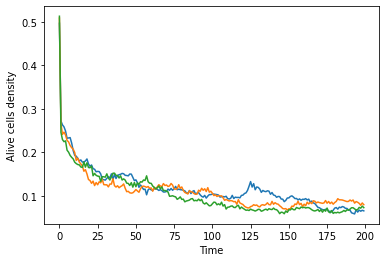

In [19]:
for i in range(3):
    ev = game(200)
    plt.plot(np.arange(len(ev)),ev)
plt.ylabel('Alive cells density')
plt.xlabel('Time')

plt.show()

Text(0.5, 0, 'Time')

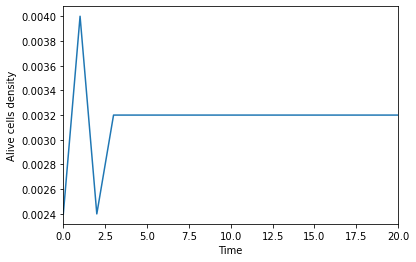

In [55]:
ev = game(200,seed='replicator')
plt.xlim([0,20])
plt.plot(np.arange(len(ev)),ev,'go')
plt.ylabel('Alive cells density')
plt.xlabel('Time')

plt.show()